In [3]:

#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing Seaborn for statistical data visualization, built on top of Matplotlib.

import warnings
from rich import print
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings. filterwarnings("ignore")
#---------------------------------------------------------------------------------------------------------------------------

In [4]:
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Set max rows displayed for readability
#pd.set_option("display.max_rows", 6)

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ziedtuihri/Data_Science_Projects/refs/heads/main/data/dataProductivity%20Prediction%20of%20Garment%20Employeese.csv",
)


In [6]:
df['date']= pd.to_datetime(df['date'])

In [7]:
df['wip'].fillna(value=0, inplace=True)

In [8]:
def find_daterange(quarter):
    print('Dates between '+ df[df['quarter'] == quarter]['date'].min().strftime('%m/%d/%Y') +
          ' and ' + df[df['quarter'] == quarter]['date'].max().strftime('%m/%d/%Y') +
          ' in ' + quarter)

find_daterange('Quarter1')
find_daterange('Quarter2')
find_daterange('Quarter3')
find_daterange('Quarter4')
find_daterange('Quarter5')

Dates between 01/01/2015 and 03/07/2015 in Quarter1

Dates between 01/08/2015 and 03/11/2015 in Quarter2

Dates between 01/15/2015 and 02/19/2015 in Quarter3

Dates between 01/22/2015 and 02/28/2015 in Quarter4

Dates between 01/29/2015 and 01/31/2015 in Quarter5

In [9]:

# Ensure dates are sorted in ascending order
df = df.sort_values(by='date').reset_index(drop=True)

In [10]:
# Fill missing 'department' values based on the 'wip' conditions
df['department'] = df.apply(lambda row: 'finishing' if row['wip'] == 0 else 'sewing' if pd.isna(row['department']) and row['wip'] > 0 else row['department'], axis=1)


In [11]:
# Remove rows where 'date' column has NaN values
df = df.dropna(subset=['date'])



In [12]:
# Loop through the DataFrame to fill NaN values in the 'quarter' column
for i in range(1, len(df) - 1):
    # Check if the current 'quarter' is NaN
    if pd.isna(df.loc[i, 'quarter']):
        # Get previous and next quarters
        previous_quarter = df.loc[i - 1, 'quarter']
        next_quarter = df.loc[i + 1, 'quarter']

        # Get previous and next dates
        previous_date = df.loc[i - 1, 'date']
        next_date = df.loc[i + 1, 'date']

        # Check if both previous and next quarters match
        # and if the month and day are the same for previous and next dates
        if (previous_quarter == next_quarter and
            previous_date.month == next_date.month and
            previous_date.day == next_date.day):

            # Set the current NaN to the matching quarter
            df.loc[i, 'quarter'] = previous_quarter



In [13]:
# Remove rows where 'quarter' column has NaN values
df = df.dropna(subset=['quarter'])

In [14]:
# Loop through the DataFrame to fill NaN values in the 'day' column
for i in range(1, len(df) - 1):
    # Check if the current 'day' is NaN
    if pd.isna(df.iloc[i]['day']):
        # Get previous and next dates
        previous_date = df.iloc[i - 1]['date']
        next_date = df.iloc[i + 1]['date']

        # Check if the previous date and next date are the same
        if previous_date.date() == next_date.date():
            # Fill the NaN with the day from the previous row (or next row, as they should be the same)
            df.iloc[i, df.columns.get_loc('day')] = df.iloc[i - 1]['day']  # You can also use df.iloc[i + 1]['day']



In [15]:
# Remove rows where 'dat' column has NaN values
df = df.dropna(subset=['day'])

In [16]:
# Define a function to fill NaN values based on the conditions
def fill_idle_columns(row):
    # If both idle_time and idle_men are NaN, set both to 0
    if pd.isna(row['idle_time']) and pd.isna(row['idle_men']):
        row['idle_time'] = 0
        row['idle_men'] = 0

    if pd.isna(row['idle_time']):
        # Fill idle_time based on idle_men
        if row['idle_men'] == 0:
            row['idle_time'] = 0

    if pd.isna(row['idle_men']):
        # Fill idle_men based on idle_time
        if row['idle_time'] == 0:
            row['idle_men'] = 0

    return row

# Apply the function to each row of the DataFrame
df = df.apply(fill_idle_columns, axis=1)

In [17]:
# Convert NaN values in 'incentive' column to 0
df['incentive'] = df['incentive'].fillna(0)

In [18]:
# Convert NaN values in 'over_time' column to 0
df['over_time'] = df['over_time'].fillna(0)

In [19]:
# Delete rows where 'no_of_workers' is null
df = df.dropna(subset=['no_of_workers'])

In [20]:
# Delete rows where 'team' is null
df = df.dropna(subset=['team'])

In [21]:
# Function to set 'no_of_style_change' based on 'smv'
def set_no_of_style_change(row):
    if pd.isna(row['no_of_style_change']) and pd.notna(row['smv']):
        if row['smv'] == 11.41:
            return 2
        elif row['smv'] == 30.1:
            return 1
    return row['no_of_style_change']

# Apply the function to the DataFrame
df['no_of_style_change'] = df.apply(set_no_of_style_change, axis=1)

In [22]:
# Delete rows where 'no_of_style_change' is null
df = df.dropna(subset=['no_of_style_change'])

In [23]:
# Delete rows where 'smv' is null
df = df.dropna(subset=['smv'])

In [24]:
#to deal with the anomalies above, the figures will be truncated

df['no_of_workers'] = df['no_of_workers'].apply(lambda x: int(x))

# Convert 'actual_productivity' to float
df['actual_productivity'] = df['actual_productivity'].astype(float)

# Format 'actual_productivity' to display 9 decimal places
df['actual_productivity'] = df['actual_productivity'].apply(lambda x: f"{x:.9f}")


In [25]:
# Delete rows where 'actual_productivity' is null
df = df.dropna(subset=['actual_productivity'])

In [26]:
# Delete rows where 'targeted_productivity' is null
df = df.dropna(subset=['targeted_productivity'])

In [27]:
df['department'] = df['department'].str.replace("sweing", "sewing")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153 entries, 0 to 1271
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1153 non-null   datetime64[ns]
 1   quarter                1153 non-null   object        
 2   department             1153 non-null   object        
 3   day                    1153 non-null   object        
 4   team                   1153 non-null   float64       
 5   targeted_productivity  1153 non-null   float64       
 6   smv                    1153 non-null   float64       
 7   wip                    1153 non-null   float64       
 8   over_time              1153 non-null   float64       
 9   incentive              1153 non-null   float64       
 10  idle_time              1153 non-null   float64       
 11  idle_men               1153 non-null   float64       
 12  no_of_style_change     1153 non-null   float64       
 13  no_of_wo

In [29]:
#checking for missing values
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

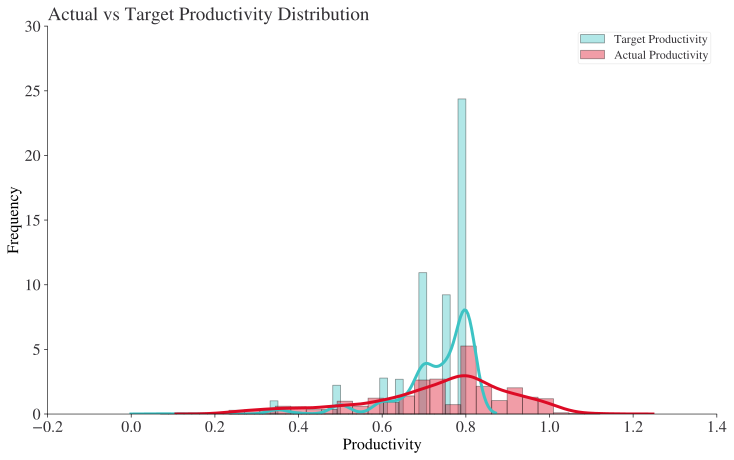

In [30]:


fig,ax =plt.subplots(figsize=(12, 7))
sns.set_color_codes("dark")
sns.set_palette(sns.color_palette("deep"))
sns.distplot(df["targeted_productivity"] , label='Target Productivity' , color="#3dc3c4");
sns.distplot(df["actual_productivity"] , label='Actual Productivity' , color="#dd0b25");
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.title('Actual vs Target Productivity Distribution')
plt.legend()


Text(0, 0.5, '')

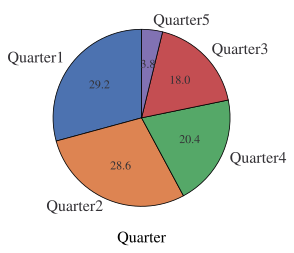

In [31]:
df['quarter'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')
plt.xlabel('Quarter')
plt.ylabel('')

In [32]:
#separating variables for ease of analysis to those that can
#be considered continuous and categorical
cat = ["quarter", "department", "day", "team", "no_of_style_change"]
contin = ["targeted_productivity", "smv", "wip", "over_time", "idle_men", "incentive", "idle_time", "no_of_workers", "actual_productivity"]


In [33]:
#checking for anomalies

for col in cat:
  print(col)
  print(df[col].unique())


  print('\n')


quarter

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department

['sewing' 'finishing']

day

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

team

[ 8. 11.  4.  7. 10.  5.  9.  2.  3. 12.  1.  6.]

no_of_style_change

[0. 1. 2.]

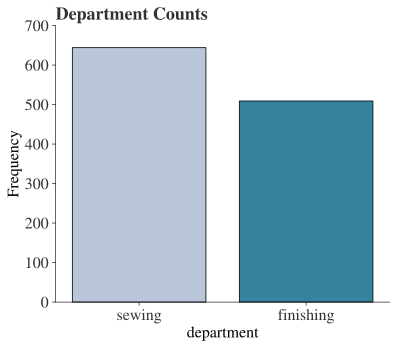

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.countplot(x='department', data=df, order=df['department'].value_counts().index, palette="PuBuGn")
plt.title("Department Counts", fontsize=18, fontweight="bold")
plt.ylabel('Frequency')
plt.show()


In [35]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


In [36]:
# Removing the word Quarter from the quarter column and leave the numbers
df['quarter'] = df['quarter'].str.replace('Quarter','')

# Changing the datatype to numeric
df['quarter'] = df['quarter'].astype(int)

#confirming changes
print(df.quarter.unique())
print(df.quarter.dtype)


[1 2 3 4 5]

int64

In [37]:
# Correcting the spelling of sewing in the department column
df['department'] = df['department'].str.replace('sweing','sewing')

# Removing the spacing from the word finishing in the department column
df['department'] = df['department'].str.replace('finishing ','finishing')

#confirming changes
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

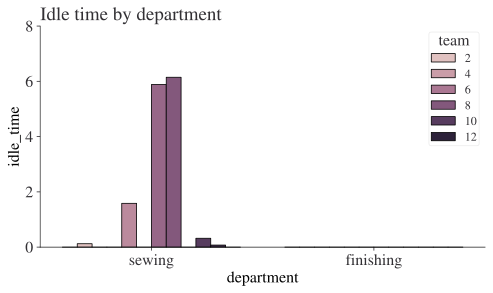

In [38]:
#Idle time by department
sns.barplot(x='department', y='idle_time',hue ='team' ,data=df, ci= None)
plt.title("Idle time by department")
plt.show()

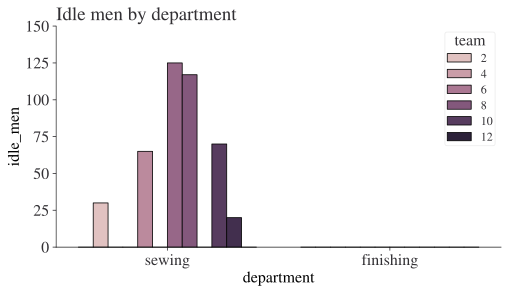

In [39]:

#Idle men by department
sns.barplot(x='department', y='idle_men',hue ='team' ,data=df, ci= None, estimator=sum)
plt.title("Idle men by department")
plt.show()

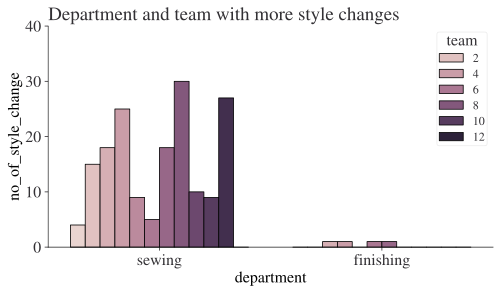

In [40]:

#Department and team with more style changes

sns.barplot(x='department', y='no_of_style_change',hue ='team' ,data=df, ci= None, estimator=sum)
plt.title("Department and team with more style changes")
plt.show()

In [41]:

#pairplots of numerical data
sns.pairplot(df[contin])
# sns.set_style('white')
fig.tight_layout()
plt.show()

In [42]:

#checking for columns with object datatype
for col in cat:
  if df[col].dtype == "object":
    print(col)

department

day

In [43]:

#creating a copy of the dataframe
df_enc = df.copy()

In [44]:

print(df.day.unique())
print(df.department.unique())

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

['sewing' 'finishing']

In [45]:

#encoding
repl_dict = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday':2,
    'Thursday':3,
    'Saturday':4,
    'Sunday':5
}
df_enc['day'] = df_enc['day'].replace(repl_dict)

df_enc['department'] = df_enc['department'].replace({'sewing':0, 'finishing':1})

In [46]:

# checking that the values were encoded
#
print(df_enc.department.unique())
print(df_enc.day.unique())

[0 1]

[3 4 5 0 1 2]

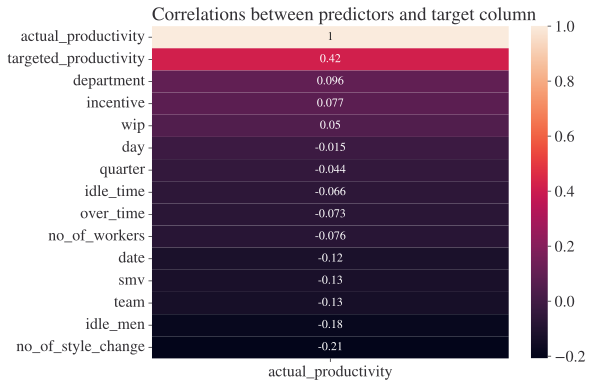

In [47]:
#Correlation Heatmaps
#highlighting correlations specifically with target
corr = df_enc.corr()
target_col=corr[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

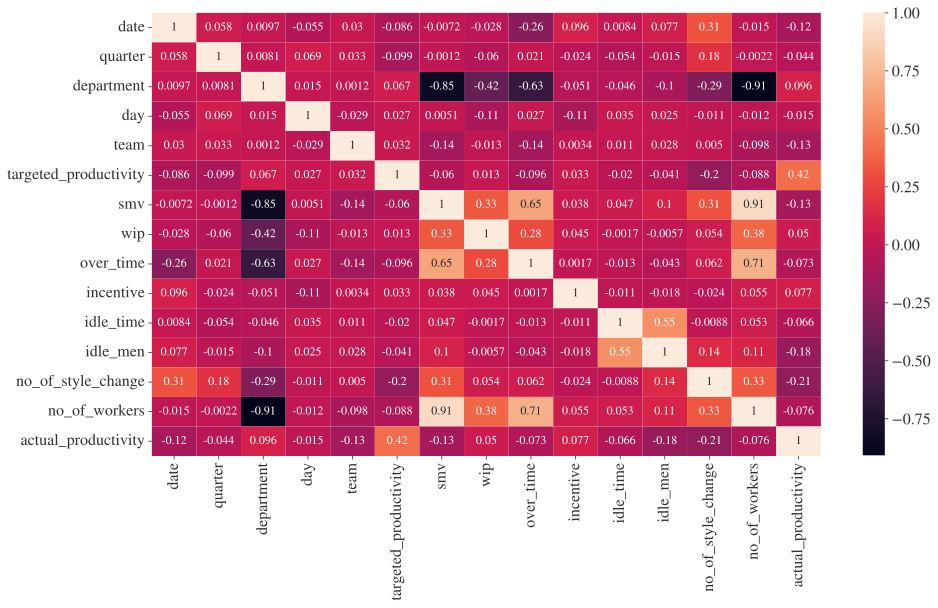

In [48]:
#showing correlation on a heatmap

plt.figure(figsize=(15,8))
sns.heatmap(df_enc.corr(),annot=True)
plt.show()

# Modelling

In [64]:

#the aspects of the date of interest (quarter of the month and day of the week)
#are extracted, therefore will drop date column .

df_enc.drop(columns=['date'], inplace=True, axis=1)

#printing variables that will be used in modelling
print(df_enc.columns)

KeyError: "['date'] not found in axis"

In [50]:
#separating features and target for use in modelling

X = df_enc.drop(['actual_productivity'], axis=1)

y = df_enc['actual_productivity']

In [51]:

# Splitting dataset to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [52]:

#list with feature names
x_cols = X.columns
x_cols

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers'],
      dtype='object')

In [53]:

#scaled features
#transforming test based on values obtained from train (scaler should only be
# fitted on train set then used to transform both train and test to prevent
# data leakage caused by fitting on entire dataset)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [54]:
# Convert y to numeric, coercing errors to NaN
y = pd.to_numeric(y, errors='coerce')

# Drop any NaN values that result from the conversion
y = y.dropna()

# Calculate and print mean and range
print("mean:", y.mean())
print("range:", y.max() - y.min())


mean: 0.7353522559019607

range: 0.886732024

In [55]:

#list that will track rmses
rmses = []

## Linear regression

In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Ensure y_train is numeric and convert invalid entries to NaN
y_train = pd.to_numeric(y_train, errors='coerce')

# Check for NaNs in y_train after conversion
print("NaN values in y_train after conversion:", y_train.isna().sum())

# Handle NaNs in y_train by filling or dropping them
y_train = y_train.fillna(y_train.mean())  # For example, replace NaNs with the mean

# Replacing NaNs with the mean of `y_test`
y_test = pd.to_numeric(y_test, errors='coerce')
y_test.fillna(y_test.mean(), inplace=True)

# Now fit the model
regression = LinearRegression()
regression.fit(X_train_sc, y_train)

# Predict on the test set
y_pred = regression.predict(X_test_sc)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


NaN values in y_train after conversion: 27

Mean Squared Error: 0.021879996228727907

Root Mean Squared Error: 0.1479188839490344

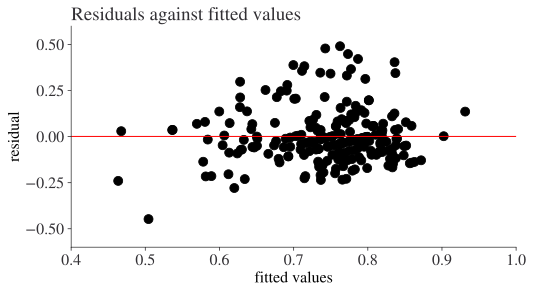

In [57]:
#Checking for homoscedasticity
# Creating the residuals by substracting the test value from the predicted
# value for each row in the test dataset

residuals = np.subtract(y_pred, y_test)


#plotting residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals against fitted values')
plt.show()


# Lasso regression
Introduces penalty (on sum of absolute values of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

It can be used in feature selection because it can shrink the value of a coefficient to zero, but a drawback in cases of multicollinearity is that since it randomly selects which variable to prioritise, it may drop a column considered more useful for interpretation .

In [58]:

#finding best hyperparameter (penalty) value for lasso
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
lasso = Lasso()
#finding alpha value
search = GridSearchCV(estimator=lasso,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 0.001}

In [59]:
#using scaled features

#fitting lasso model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = lasso.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append([f'Tuned lasso model RMSE: {rmse}'])


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.0218116668499535

Root Mean Squared Error: 0.14768773425695683

In [60]:
for x in rmses:
  print(f'\n{x}')

['Tuned lasso model RMSE: 0.14768773425695683']

The root mean squared error using lasso is slightly lower than the baseline.

# Ridge Regression
Introduces penalty (on sum of squares of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

 Unlike Lasso, it cant shrink the value of a coefficient to zero to completely eliminate features. It gives features with multicollinearity similar coefficients.

In [61]:

#ridge regression
#finding best alpha value.
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
ridge = Ridge(random_state=0)
#finding alpha value
search = GridSearchCV(estimator=ridge,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 2.0}

In [62]:

#using scaled features

#fitting ridge model
ridge = Ridge(alpha=1.9000000000000001)
ridge.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = ridge.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Tuned ridge model RMSE: {rmse}')

Mean Squared Error: 0.02188598598190899

Root Mean Squared Error: 0.14793912931306913

In [63]:
for x in rmses:
  print(f'\n{x}')

['Tuned lasso model RMSE: 0.14768773425695683']

Tuned ridge model RMSE: 0.14793912931306913

The rmse with ridge is higher than lasso, lower than the baseline

# Elastic Net Regression
It is a hybrid version of lasso and ridge regression. It applies a penalty to the sum of absoulte values of coefficients as well as to the sum of squares of coefficients.

In [65]:
#finding best hyperparameter values - alpha and l1_ratio
elastic=ElasticNet()
parameters = {'alpha': np.concatenate(([0.0001,0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1))),
              'l1_ratio':[.2,.4,.6,.8,1]}

search=GridSearchCV(estimator=elastic,param_grid=parameters,scoring='neg_mean_squared_error')

search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 0.0001, 'l1_ratio': 0.4}

In [66]:
#using scaled features

#fitting model
elastic=ElasticNet(alpha=0.001,l1_ratio=0.2)
elastic.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = elastic.predict(X_test_sc)

#evaluating model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append(f'Tuned elastic net model RMSE: {rmse}')

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.021858498207081557

Root Mean Squared Error: 0.14784619781070313

In [67]:


for x in rmses:
  print(f'\n{x}')

['Tuned lasso model RMSE: 0.14768773425695683']

Tuned ridge model RMSE: 0.14793912931306913

Tuned elastic net model RMSE: 0.14784619781070313

The elastic net model has an rmse slightly lower than the baseline and ridge but slightly higher than lasso



## **Comparing coefficients**

In [68]:
#creating dataframe with coefficients and rank of coefficients' absolute values
df_coef = pd.DataFrame(regression.coef_, columns=['linear'], index=x_cols)
df_coef['linear rank'] = df_coef['linear'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['lasso'] = lasso.coef_
df_coef['lasso rank'] = df_coef['lasso'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['ridge'] = ridge.coef_
df_coef['ridge rank'] = df_coef['ridge'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['elastic'] = elastic.coef_
df_coef['elastic rank'] = df_coef['elastic'].apply(lambda x: abs(x)).rank(ascending=False)


df_coef.sort_values(by=['linear rank'])

linear  linear rank     lasso  lasso rank     ridge  \
no_of_workers          0.075386          1.0  0.052186         2.0  0.072851   
targeted_productivity  0.068676          2.0  0.067571         1.0  0.068496   
smv                   -0.060600          3.0 -0.050685         3.0 -0.059106   
idle_men              -0.031327          4.0 -0.029224         5.0 -0.031202   
team                  -0.030291          5.0 -0.029539         4.0 -0.030222   
no_of_style_change    -0.020250          6.0 -0.018502         6.0 -0.020168   
over_time             -0.019072          7.0 -0.014481         7.0 -0.018733   
department             0.012155          8.0  0.001614        13.0  0.011373   
idle_time              0.012100          9.0  0.010090         8.0  0.012025   
incentive              0.010489         10.0  0.009985         9.0  0.010512   
wip                    0.008346         11.0  0.007275        10.0  0.008385   
quarter                0.007445         12.0  0.005683        11.0  0.007383   
day                   -0.002584         13.0 -0.002067        12.0 -0.002624   

                       ridge rank   elastic  elastic rank  
no_of_workers                 1.0  0.069826           1.0  
targeted_productivity         2.0  0.068385           2.0  
smv                           3.0 -0.058072           3.0  
idle_men                      4.0 -0.030860           4.0  
team                          5.0 -0.030115           5.0  
no_of_style_change            6.0 -0.019873           6.0  
over_time                     7.0 -0.018036           7.0  
department                    9.0  0.009762          10.0  
idle_time                     8.0  0.011670           8.0  
incentive                    10.0  0.010396           9.0  
wip                          11.0  0.008145          11.0  
quarter                      12.0  0.007070          12.0  
day                          13.0 -0.002495          13.0

# KNN

In [69]:
# Training and Predictions

#initial arbitrary value of 5
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn model 1 RMSE: {rmse}')


Mean Squared Error: 0.02071394205455128

Root Mean Squared Error: 0.1439233895325957

In [70]:


for x in rmses:
  print(f'\n{x}')

['Tuned lasso model RMSE: 0.14768773425695683']

Tuned ridge model RMSE: 0.14793912931306913

Tuned elastic net model RMSE: 0.14784619781070313

Knn model 1 RMSE: 0.1439233895325957

In [71]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_neighbors': np.arange(3, 15, 2),
              'metric': ['minkowski', 'euclidean','manhattan']}

knnr = KNeighborsRegressor()
#finding values
search = GridSearchCV(estimator=knnr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5}

In [72]:

# Training and Predictions
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7, metric='manhattan')
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn further tuned model RMSE: {rmse}')


Mean Squared Error: 0.018816061609895338

Root Mean Squared Error: 0.13717165016830313

In [73]:
for x in rmses:
  print(f'\n{x}')

['Tuned lasso model RMSE: 0.14768773425695683']

Tuned ridge model RMSE: 0.14793912931306913

Tuned elastic net model RMSE: 0.14784619781070313

Knn model 1 RMSE: 0.1439233895325957

Knn further tuned model RMSE: 0.13717165016830313

After tuning the number of neighbours and distance metric, the knn model results in lowest rmse so far



# Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

#Fitting the model


forest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Random forest model 1 RMSE: {rmse}')


Mean Squared Error: 0.013107525307172328

Root Mean Squared Error: 0.11448810115978135

The first random forest model has the lowest rmse observed so far



In [75]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7)}
rforest = RandomForestRegressor(random_state=0)
#finding values
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

{'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 450}

In [76]:

#Fitting the model

forest = RandomForestRegressor(n_estimators = 50, random_state=0, min_samples_split = 10, max_depth=6)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Rforest further tuned model RMSE: {rmse}')

Mean Squared Error: 0.012480020904996388

Root Mean Squared Error: 0.11171401391498019

In [77]:
for x in rmses:
  print(f'\n{x}')

['Tuned lasso model RMSE: 0.14768773425695683']

Tuned ridge model RMSE: 0.14793912931306913

Tuned elastic net model RMSE: 0.14784619781070313

Knn model 1 RMSE: 0.1439233895325957

Knn further tuned model RMSE: 0.13717165016830313

Random forest model 1 RMSE: 0.11448810115978135

Rforest further tuned model RMSE: 0.11171401391498019

After tuning the random forest further, lowest RMSE so far of 0.1236 is obtained.

# Gradient boosting

In [78]:

from sklearn.ensemble import GradientBoostingRegressor

#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gradient boosting model 1 RMSE: {rmse}')

Mean Squared Error: 0.015348060261487474

Root Mean Squared Error: 0.12388728853876606

In [79]:
for x in rmses:
  print(f'\n{x}')

['Tuned lasso model RMSE: 0.14768773425695683']

Tuned ridge model RMSE: 0.14793912931306913

Tuned elastic net model RMSE: 0.14784619781070313

Knn model 1 RMSE: 0.1439233895325957

Knn further tuned model RMSE: 0.13717165016830313

Random forest model 1 RMSE: 0.11448810115978135

Rforest further tuned model RMSE: 0.11171401391498019

Gradient boosting model 1 RMSE: 0.12388728853876606

In [80]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(100, 500, 100),
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': np.arange(2,7)}
gdbr = GradientBoostingRegressor(random_state=0)

#finding values
search = GridSearchCV(estimator=gdbr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400}

In [81]:

#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=2, random_state=0)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gboosting further tuned model RMSE: {rmse}')

Mean Squared Error: 0.013697480527957126

Root Mean Squared Error: 0.11703623596116344

In [82]:
for x in rmses:
  print(f'\n{x}')

['Tuned lasso model RMSE: 0.14768773425695683']

Tuned ridge model RMSE: 0.14793912931306913

Tuned elastic net model RMSE: 0.14784619781070313

Knn model 1 RMSE: 0.1439233895325957

Knn further tuned model RMSE: 0.13717165016830313

Random forest model 1 RMSE: 0.11448810115978135

Rforest further tuned model RMSE: 0.11171401391498019

Gradient boosting model 1 RMSE: 0.12388728853876606

Gboosting further tuned model RMSE: 0.11703623596116344

# Neural Networks

In [83]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='identity', max_iter=2000, random_state=0)

# Fitting the model
mlp.fit(X_train_sc,y_train)

# Predict
y_pred = mlp.predict(X_test_sc)

#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'MLP model 1 RMSE: {rmse}')

Mean Squared Error: 0.021971450151903552

Root Mean Squared Error: 0.14822769697969254

In [84]:
for x in rmses:
  print(f'\n{x}')

['Tuned lasso model RMSE: 0.14768773425695683']

Tuned ridge model RMSE: 0.14793912931306913

Tuned elastic net model RMSE: 0.14784619781070313

Knn model 1 RMSE: 0.1439233895325957

Knn further tuned model RMSE: 0.13717165016830313

Random forest model 1 RMSE: 0.11448810115978135

Rforest further tuned model RMSE: 0.11171401391498019

Gradient boosting model 1 RMSE: 0.12388728853876606

Gboosting further tuned model RMSE: 0.11703623596116344

MLP model 1 RMSE: 0.14822769697969254

Variable: targeted_productivity, Importance: 0.3

Variable: incentive, Importance: 0.16

Variable: no_of_workers, Importance: 0.15

Variable: smv, Importance: 0.12

Variable: over_time, Importance: 0.1

Variable: team, Importance: 0.06

Variable: idle_men, Importance: 0.04

Variable: quarter, Importance: 0.03

Variable: wip, Importance: 0.03

Variable: no_of_style_change, Importance: 0.01

Variable: department, Importance: 0.0

Variable: day, Importance: 0.0

Variable: idle_time, Importance: 0.0

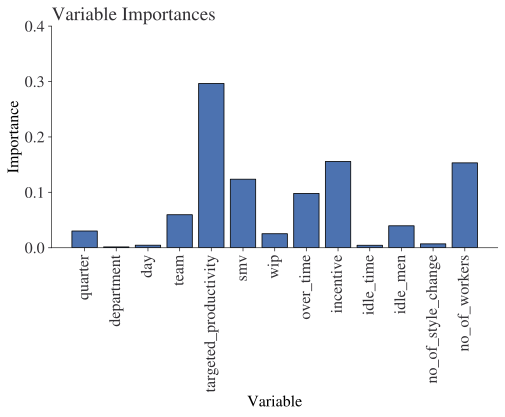

In [85]:

# List of tuples with variable and importance using the gbc tuned model (the best recall)
importances = gbr.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_cols, importances)]

#sorting the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the feature and importances
for feat, signif in feature_importances:
  print(f'Variable: {feat}, Importance: {signif}')

# Making a bar chart
plt.bar(x_cols, importances)
# Tick labels for x axis
plt.xticks(rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
from google.colab import files



# Example DataFrame (assuming 'df' is your original DataFrame)
X = pd.DataFrame(df)

# Save DataFrame to an Excel file
X.to_excel("output_file3.xlsx", index=False)

# Download the file
files.download("output_file3.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion
The main objectives of the project were achieved:

The best model - Rforest further tuned model RMSE: 0.11171401391498019  trained with these features: targeted productivity, standard minute value, incentive, number of workers, team, work in progress, over time, idle men,quarter, and department. The rmse of this model was 0.1194.

The top factors influencing the productivity level of employees are:

Targeted productivity
Standard minute value
Incentive
The relationships between level of productivity and the predictor variables were investigated and visualised through exploratory analysis.
Recommedations
The management of each team in the industry should set clear, high, achievable goals each day. Targeted productivity was identified as a key feature during modelling, and it had a moderate positive correlation with actual productivity.

Incentives motivate teams to work harder. The average incentives were higher in the category where productivity was greater than 0.5. Offering favourable incentives therefore aids in boosting productivity.

In the sewing department, we recommend that the management of the lowest performing teams (5, 7 and 8) consider offering better incentives to their teams to motivate them more. Additionally, the management should investigate causes of high idle time in these teams, such as possible machine breakdowns.

In the finishing department, we similarly recommend offering better incentives to the lowest performing teams (6,7,8). Teams 6 and 7 had as low as 0 average incentives.